## CASE STUDY 4: Visualizations in Python on Sales Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

In [2]:
sales = pd.read_csv('SalesData.csv')
sales

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3704,7576,Account2736,East,EMPIRE,SYRACUSE,NY,Out,Feb,3684.48,0.00,1.0,0.0,1.06,1.14
3705,4969,Account2740,Central,SOUTHERN STAR,MONTGOMERY,AL,Med,Aug,3684.48,0.00,1.0,0.0,0.96,1.11
3706,2850,Account2746,East,SYNERGY,ASHEVILLE,NC,High,Nov,5067.70,0.00,2.0,0.0,1.11,1.55
3707,1102265,Account2748,West,DIAMONDBACK,SCOTTSDALE,AZ,Out,Jan,3684.48,0.00,1.0,0.0,1.31,1.48


#### 1. Compare Sales by region for 2016 with 2015 using bar chart

In [12]:
summ1 = sales.groupby('Region')[['Sales2015', 'Sales2016']].sum()
summ1

,Sales2015,Sales2016
Region,,
Central,7.891729e+06,9.787809e+06
East,9.512916e+06,1.266723e+07
West,5.349745e+06,7.209689e+06


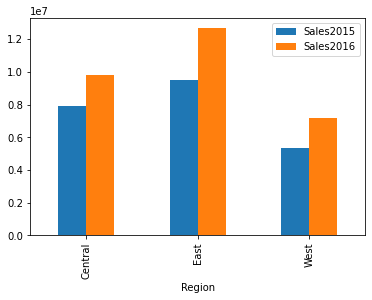

In [13]:
summ1.plot(kind = 'bar')
plt.show()

#### 2. What are the contributing factors to the sales for each region in 2016. Visualize it using a Pie Chart.

In [68]:
pie_sales = sales.groupby('Region').Sales2016.sum()
pie_sales

Region
Central    9.787809e+06
East       1.266723e+07
West       7.209689e+06
Name: Sales2016, dtype: float64

<AxesSubplot:ylabel='Region'>

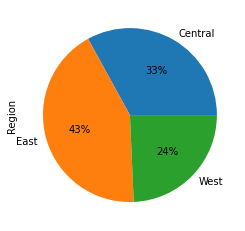

In [69]:
pie_sales.plot.pie(label = ('Region'), autopct = '%1.0f%%')

#### 3. Compare the total sales of 2015 and 2016 with respect to Region and Tiers

In [22]:
summ2 = sales.groupby(['Region', 'Tier'])[['Sales2015', 'Sales2016']].sum()
summ2

Sales2015     Sales2016
Region  Tier                            
Central High  4.798698e+06  6.026043e+06
        Low   9.434397e+05  1.132833e+06
        Med   2.068226e+06  2.632181e+06
        Out   8.136489e+04 -3.248530e+03
East    High  6.102946e+06  7.817151e+06
        Low   9.016658e+05  1.144930e+06
        Med   2.470998e+06  3.705150e+06
        Out   3.730655e+04  0.000000e+00
West    High  2.944789e+06  3.768038e+06
        Low   6.710644e+05  1.099502e+06
        Med   1.718476e+06  2.342149e+06
        Out   1.541508e+04  0.000000e+00

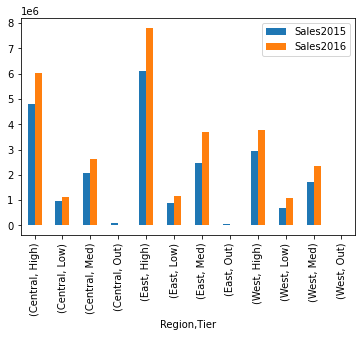

In [23]:
summ2.plot(kind = 'bar')
plt.show()

#### 4. In East region, which state registered a decline in 2016 as compared to 2015?

In [30]:
summ3 = sales.groupby(['Region', 'State'])[['Sales2015', 'Sales2016']].sum()
summ3

Sales2015     Sales2016
Region  State                            
Central AL     5.091037e+05  5.958284e+05
        AR     2.133175e+05  2.276081e+05
        IL     6.217938e+05  7.843073e+05
        IN     3.166781e+05  5.996723e+05
        KY     5.312149e+05  6.332189e+05
        LA     4.793662e+05  6.803033e+05
        MI     5.686517e+05  7.072480e+05
        MS     3.045782e+05  2.204109e+05
        OH     9.276875e+05  1.221085e+06
        OK     2.484607e+05  3.396445e+05
        PA     3.002670e+05  2.877924e+05
        TN     4.370386e+05  5.522301e+05
        TX     1.712440e+06  2.013116e+06
        WI     3.044250e+05  4.403802e+05
        WV     4.167062e+05  4.849640e+05
East    CT     1.972028e+05  3.235023e+05
        DC     2.167240e+05  2.574217e+05
        FL     1.660162e+06  2.508232e+06
        GA     6.815465e+05  9.469198e+05
        MA     4.192788e+05  6.870964e+05
        MD     5.273091e+05  7.500088e+05
        ME     7.742564e+04  1.836730e+05
        NC     1.292802e+06  1.610521e+06
        NH     1.364194e+05  1.447175e+05
        NJ     5.204193e+05  7.822892e+05
        NY     1.725415e+06  1.703136e+06
        PA     7.850928e+05  8.943195e+05
        RI     1.563118e+05  1.624546e+05
        SC     2.478118e+05  4.634141e+05
        TN     4.967700e+04  7.010941e+04
        VA     8.193191e+05  1.179415e+06
West    AZ     3.889876e+05  5.195079e+05
        CA     1.891621e+06  2.396883e+06
        CO     4.023385e+05  5.046537e+05
        IA     1.022714e+05  1.461604e+05
        ID     9.237388e+04  1.157684e+05
        IL     9.375350e+04  1.224796e+05
        KS     2.284577e+05  2.850208e+05
        MN     3.142297e+05  3.220523e+05
        MO     4.444618e+05  7.241663e+05
        NE     6.981622e+04  8.587284e+04
        NM     8.828041e+04  1.325122e+05
        NV     2.057940e+05  2.814234e+05
        OR     2.629237e+05  4.383578e+05
        SD     7.549041e+04  1.662565e+05
        TX     2.530734e+05  3.495791e+05
        UT     1.133622e+05  1.732097e+05
        WA     3.225094e+05  4.457855e+05

In [32]:
east_sales = summ3.loc['East']
east_sales

,Sales2015,Sales2016
State,,
CT,197202.790,323502.31
DC,216723.950,257421.69
FL,1660162.000,2508232.28
GA,681546.460,946919.77
MA,419278.750,687096.45
MD,527309.060,750008.79
ME,77425.640,183673.05
NC,1292801.640,1610521.00
NH,136419.380,144717.51


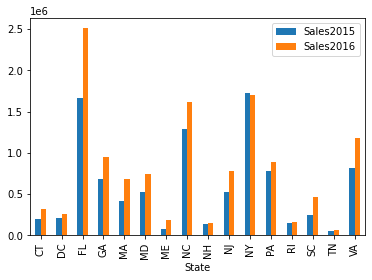

In [33]:
east_sales.plot(kind = 'bar')
plt.show()

#### 5. In all the High tier, which Division saw a decline in number of units sold in 2016 compared to 2015?

In [35]:
summ4 = sales.groupby(['Tier', 'Division'])[['Sales2015', 'Sales2016']].sum()

In [37]:
high_sales = summ4.loc['High']

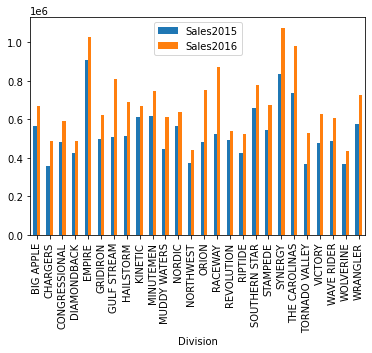

In [38]:
high_sales.plot(kind = 'bar')
plt.show()

#### 6. Create a new column Qtr using numpy.where() or any suitable utility in the imported dataset. The Quarters are based on months and defined as 
    • Jan - Mar : Q1
    • Apr - Jun : Q2
    • Jul - Sep : Q3
    • Oct - Dec : Q4

In [40]:
sales['Qtr'] = np.where(sales.Month.isin(['Jan', 'Feb', 'Mar']), 'Q1', np.where(sales.Month.isin(['Apr', 'May', 'Jun']), 'Q2', np.where(sales.Month.isin(['Jul', 'Aug', 'Sep']), 'Q3', 'Q4')))

In [41]:
sales.head()

,AccountId,AccountName,Region,Division,City,State,Tier,Month,Sales2015,Sales2016,Units2015,Units2016,TargetAchevied2015,TargetAchevied2016,Qtr
0,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Aug,0.00,13208.52,0.0,4.0,0.70,1.53,Q3
1,1116,Account1,West,DIAMONDBACK,PHOENIX W,AZ,Low,Oct,10500.78,23114.91,3.0,7.0,0.84,1.31,Q4
2,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Jun,0.00,6627.00,0.0,3.0,1.15,1.29,Q2
3,2391,Account2,East,MINUTEMEN,HARTFORD,CT,Med,Mar,19881.00,13254.00,9.0,6.0,1.33,1.17,Q1
4,2397,Account3,East,MINUTEMEN,WORCESTER,MA,Med,Sep,3684.48,0.00,1.0,0.0,1.02,1.53,Q3


#### 7. Compare Qtr wise sales in 2015 and 2016 in a bar plot

In [43]:
summ5 = sales.groupby('Qtr')[['Sales2015', 'Sales2016']].sum()

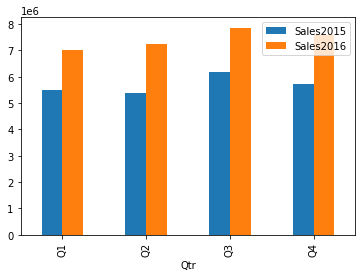

In [44]:
summ5.plot(kind = 'bar')
plt.show()

#### 8. Determine the composition of Qtr wise sales in and 2016 with regards to all the Tiers in a pie chart.
(Draw 4 pie charts representing a Quarter for each Tier)

In [58]:
summ6 = sales.pivot_table(index = 'Qtr', columns = 'Tier', values = 'Sales2016', aggfunc = 'sum')
summ6

Tier,High,Low,Med,Out
Qtr,,,,
Q1,3867718.595,948832.77,2.181402e+06,0.00
Q2,4130952.560,890594.75,2.215814e+06,0.00
Q3,4872559.250,795177.71,2.197058e+06,-3248.53
Q4,4740001.985,742659.39,2.085207e+06,0.00


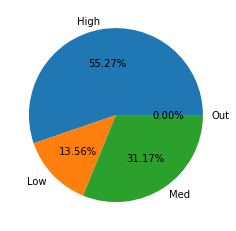

In [62]:
plt.pie(x = summ6.loc['Q1', : ], autopct='%.2f%%', labels = ['High', 'Low', 'Med', 'Out'])
plt.show()

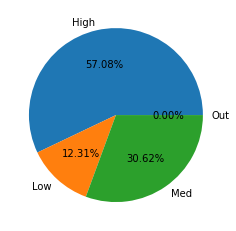

In [63]:
plt.pie(x = summ6.loc['Q2', : ], autopct='%.2f%%', labels = ['High', 'Low', 'Med', 'Out'])
plt.show()

ValueError: Wedge sizes 'x' must be non negative values

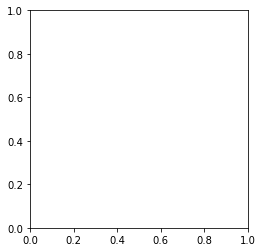

In [64]:
plt.pie(x = summ6.loc['Q3', : ], autopct='%.2f%%', labels = ['High', 'Low', 'Med', 'Out'])
plt.show()

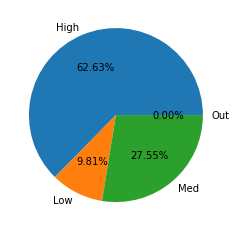

In [65]:
plt.pie(x = summ6.loc['Q4', : ], autopct='%.2f%%', labels = ['High', 'Low', 'Med', 'Out'])
plt.show()